In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns




In [2]:
ls

 Volume in drive C is System
 Volume Serial Number is C020-6B65

 Directory of C:\Users\swpatank\OneDrive - Capgemini\Desktop\McCain Foods Datasets

09/19/2018  06:37 PM    <DIR>          .
09/19/2018  06:37 PM    <DIR>          ..
09/19/2018  06:08 PM    <DIR>          .ipynb_checkpoints
09/17/2018  10:15 AM         1,156,132 agricultural-yields-in-key-crops-per-hectare-1961-2014.csv
09/17/2018  10:12 AM         3,773,149 Daily Retail Price of Potato.csv
09/17/2018  12:35 PM             5,361 Frozen_Potato_Products_Price_Index.csv
09/19/2018  06:10 PM               798 Google Trends Scraper.ipynb
09/17/2018  10:14 AM            13,481 long-term-agricultural-yields-in-the-united-kingdom.csv
09/19/2018  06:37 PM           919,054 McCain Data Analysis.ipynb
09/17/2018  10:56 AM             2,010 McCain_Foods_Google_Trends.csv
09/17/2018  11:05 AM             2,168 McCain_Fries_Google_Trends.csv
09/17/2018  11:04 AM             2,149 McCain_Potato_Google_Trends.csv
09/17/2018  11:04 AM   

# UK Potato Agricultural Yields

In [3]:
uk_agricultural_yields = pd.read_csv('long-term-agricultural-yields-in-the-united-kingdom.csv')

In [4]:
uk_agricultural_yields.columns = ['A', 'B', 'Year', 'Potatoes', 'D']

In [5]:
uk_agricultural_yields = uk_agricultural_yields[['Year', 'Potatoes']]

In [6]:
uk_agricultural_yields.dropna(inplace = True)

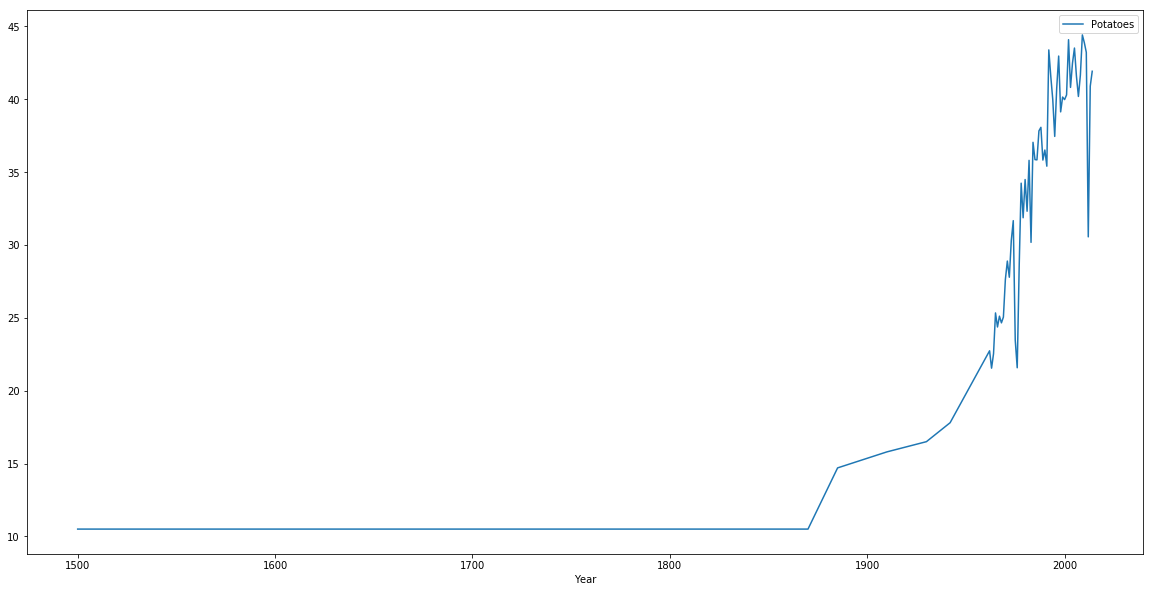

In [7]:
uk_agricultural_yields.set_index('Year').plot(figsize = (20,10))

# Frozen Potato Price Index

In [8]:
frozen_potato_pi = pd.read_csv('Frozen_Potato_Products_Price_Index.csv')

In [9]:
frozen_potato_pi.columns = ['Date', 'Price']

In [10]:
frozen_potato_pi['Date'] = pd.to_datetime(frozen_potato_pi['Date'])

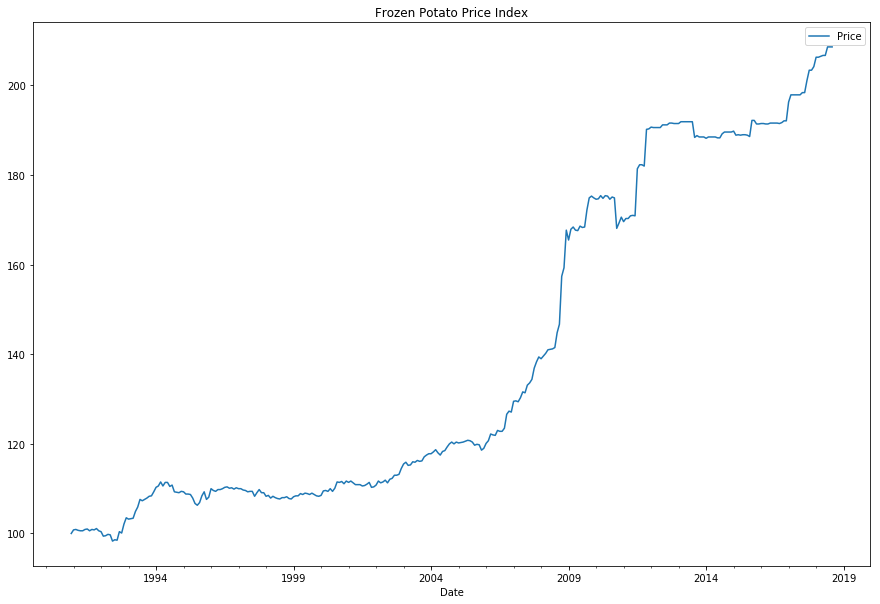

In [11]:
frozen_potato_pi.set_index('Date').plot(title = 'Frozen Potato Price Index', figsize = (15,10))

# Google Trends

In [12]:
from pytrends.request import TrendReq
import time
import random

In [13]:
# connect to google
pytrends = TrendReq(hl='en-US', tz=360)

In [14]:
term = ['McCain Foods']

In [15]:
pytrends.build_payload(term, timeframe = 'all')

In [16]:
google_trends_data = pytrends.interest_over_time().iloc[:,:-1]

In [17]:
related_queries_df = pytrends.related_queries()[term[0]]['top']

In [18]:
related_topics_df_mccain = list(pytrends.related_topics().values())[0][['title', 'value']]

In [19]:
term = ['Vegan']

In [20]:
pytrends.build_payload(term, timeframe = 'all')

In [21]:
google_trends_data = pytrends.interest_over_time().iloc[:,:-1]

In [22]:
related_queries_df = pytrends.related_queries()[term[0]]['top']

In [23]:
related_topics_df_vegan = list(pytrends.related_topics().values())[0][['title', 'value']]

# Twitter Sentiment Analysis

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

In [25]:
sid= SentimentIntensityAnalyzer()

In [26]:
consumer_key = 'RK9gel4LdospFlZUiAAZVK2Rf' 
consumer_secret = 'mFc3TXKaVt6KK5eh0mewOWwChT9UY6Qv3JZyhRaSxmBPIBqqlQ' 
access_token = '1041680613269397506-TCLWGLxvEa3X93YKZKl1anVr6SHE3Q'
access_token_secret = 'B5m3pPeGHblBHLvuFZAYR0qQo9EGQSvxz9iaUMkgKV8g2'

In [27]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [28]:
# Creating the API object while passing in auth information
api = tweepy.API(auth)

# The search term you want to find
query = "fries"
# Language code (follows ISO 639-1 standards)
language = "en"

# Calling the user_timeline function with our parameters
results = api.search(q=query, lang=language)

In [29]:
tweet_terms = ['McCain Foods', 'Vegan', 'Natural', 'McCain Smiles', 'Frozen Potatoes', 'French Fries']

In [30]:
tweet_sent_dict = {}

In [31]:
tweet_df = None
for term in tweet_terms:
    results = api.search(q = term, lang = language)
    temp_tweet = []
    for a in results:
        temp_tweet.append(a.text)
    
    temp_df = pd.DataFrame({term : temp_tweet})
    
    score_list = []
    
    for t in temp_df[term]:
        score_list.append(list(sid.polarity_scores(t).values())[3])
        
    average  = sum(score_list) / float(len(score_list))
    
    tweet_sent_dict[term] = average
    

In [32]:
tweet_sent_dict

{'McCain Foods': -0.04122,
 'Vegan': 0.17345999999999998,
 'Natural': 0.09515999999999998,
 'McCain Smiles': 0.36841111111111113,
 'Frozen Potatoes': 0.15889333333333333,
 'French Fries': 0.18089999999999998}

In [33]:
sentiment = pd.DataFrame({'Hashtag' : list(tweet_sent_dict.keys()), 'Sentiment Score' : list(tweet_sent_dict.values())})

In [34]:
sentiment

,Hashtag,Sentiment Score
0,McCain Foods,-0.041220
1,Vegan,0.173460
2,Natural,0.095160
3,McCain Smiles,0.368411
4,Frozen Potatoes,0.158893
5,French Fries,0.180900


In [35]:
sentiment['Sentiment Score'] = pd.to_numeric(sentiment['Sentiment Score'])

# Questions

# Visualization

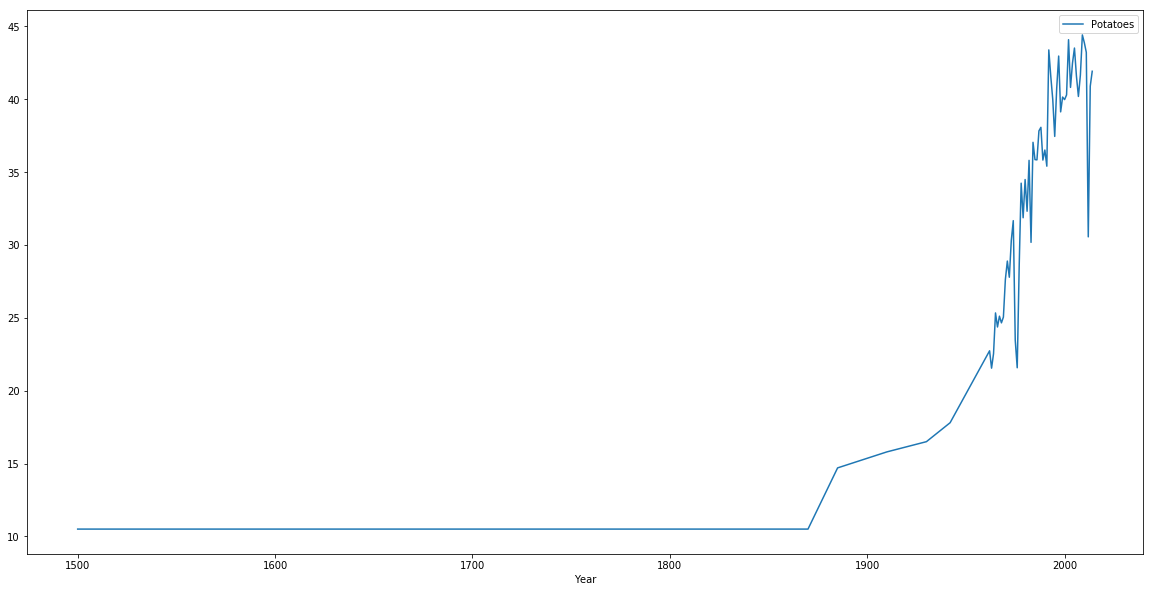

In [36]:
uk_agricultural_yields.set_index('Year').plot(figsize = (20,10))

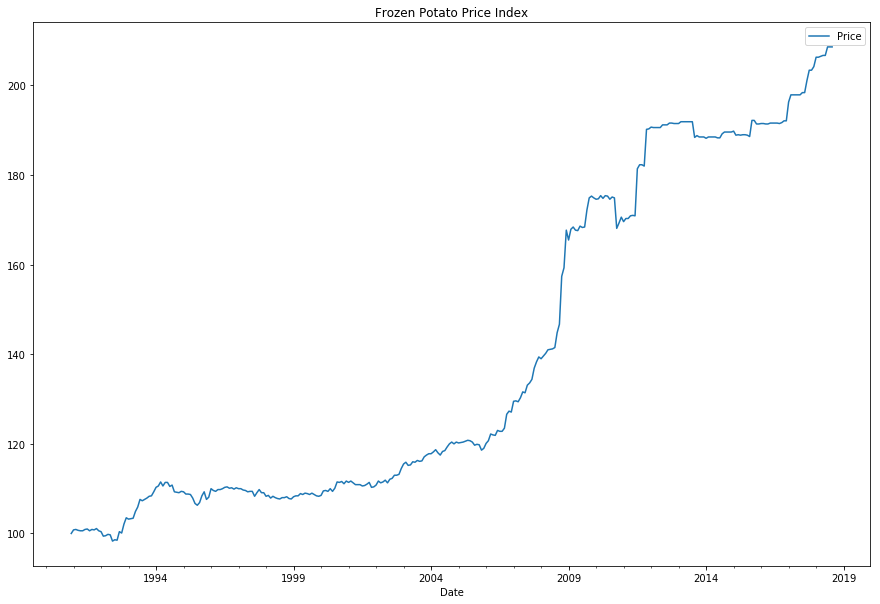

In [37]:
frozen_potato_pi.set_index('Date').plot(title = 'Frozen Potato Price Index', figsize = (15,10))

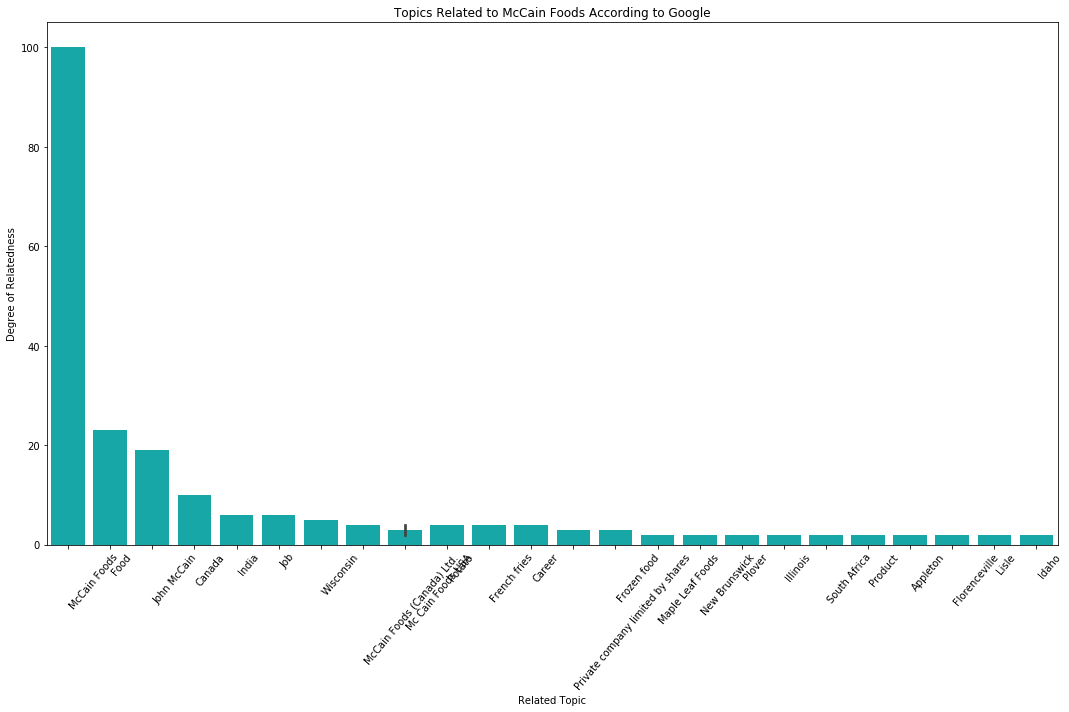

In [38]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = 'title', y = 'value', data = related_topics_df_mccain, color = 'c')
ax.set_title('Topics Related to McCain Foods According to Google')

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="left")
ax.set(xlabel='Related Topic', ylabel='Degree of Relatedness')
plt.tight_layout()
plt.show()

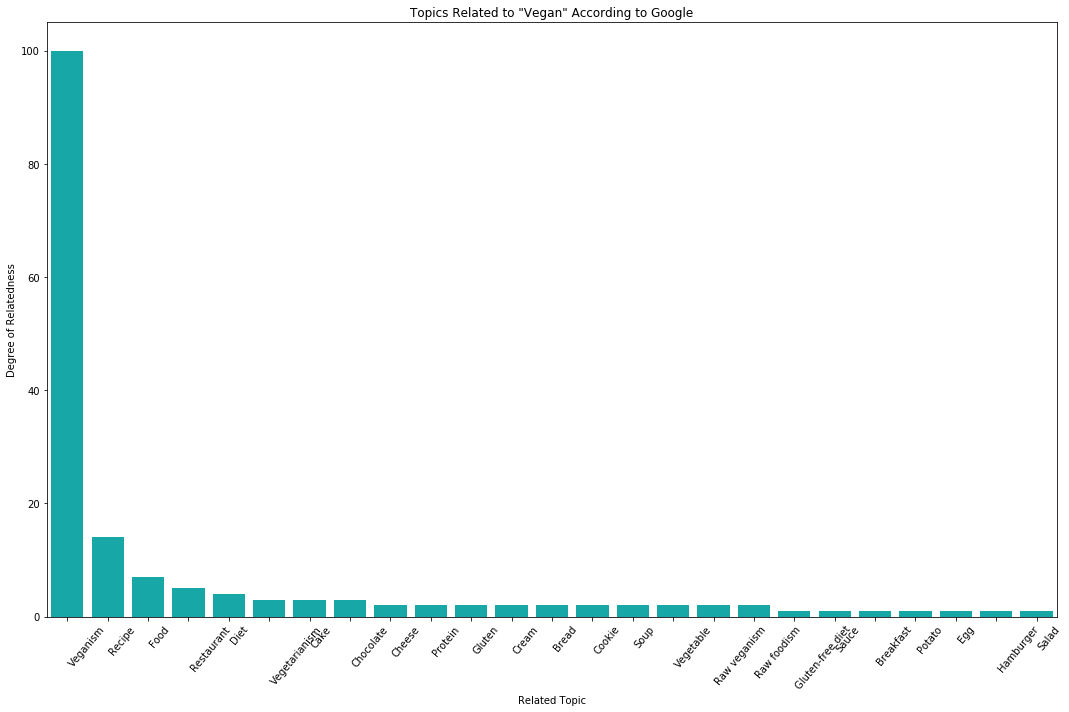

In [39]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = 'title', y = 'value', data = related_topics_df_vegan, color = 'c')
ax.set_title('Topics Related to "Vegan" According to Google')

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="left")
ax.set(xlabel='Related Topic', ylabel='Degree of Relatedness')
plt.tight_layout()
plt.show()

Text(0,0.5,'Sentiment Score')

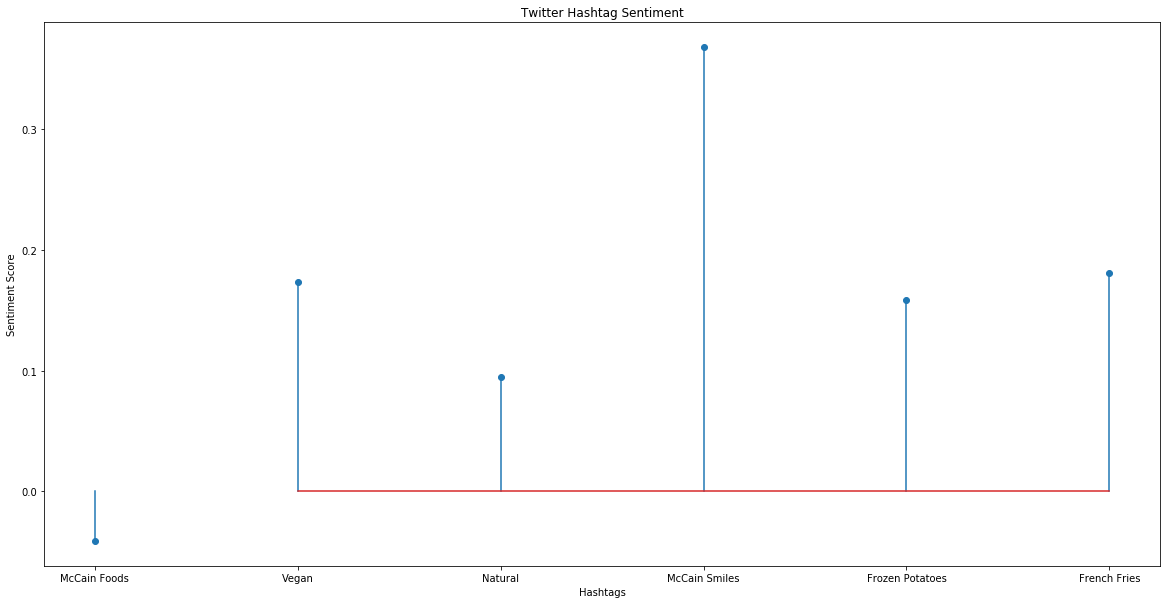

In [40]:
plt.figure(figsize = (20,10))
plt.stem(sentiment['Hashtag'], sentiment['Sentiment Score'])
plt.title("Twitter Hashtag Sentiment")
plt.xlabel('Hashtags')
plt.ylabel('Sentiment Score')

# WordCloud

In [41]:
from wordcloud import WordCloud

In [42]:
related_topics_df_mccain.head()

,title,value
0,McCain Foods,100
1,Food,23
2,John McCain,19
3,Canada,10
4,India,6


In [43]:
related_topics_df_vegan.head()

,title,value
0,Veganism,100
1,Recipe,14
2,Food,7
3,Restaurant,5
4,Diet,4


In [44]:
mccain_dict = {}

In [45]:
vegan_dict = {}

In [46]:
for a in related_topics_df_mccain['title']:
    for b in related_topics_df_mccain['value']:
        mccain_dict[a] = b
        

In [47]:
for a in related_topics_df_vegan['title']:
    for b in related_topics_df_vegan['value']:
        vegan_dict[a] = b

In [48]:
wordcloud = WordCloud()

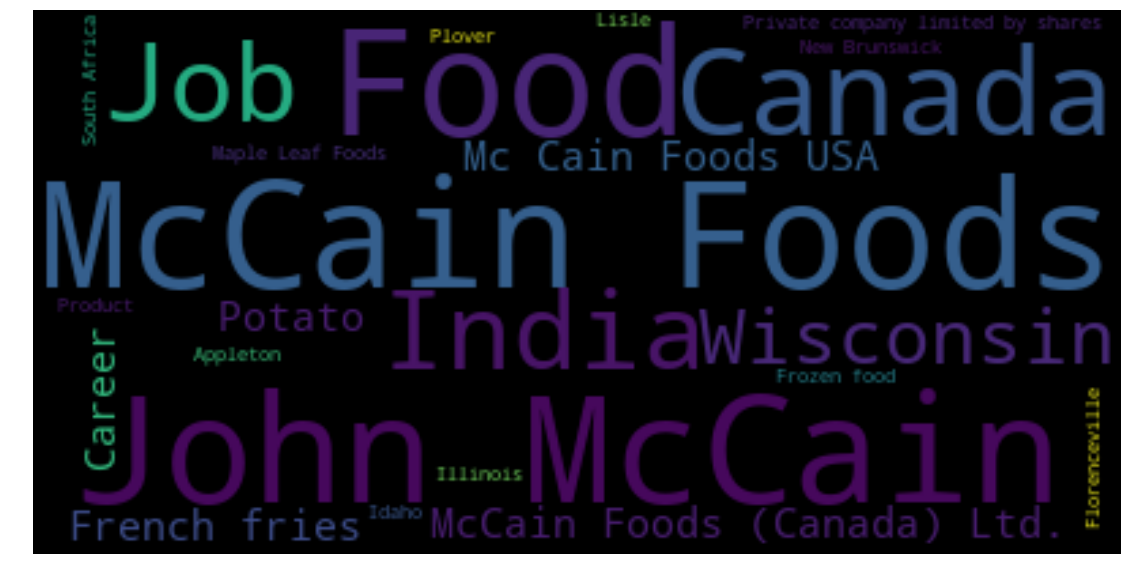

In [49]:
wordcloud.generate_from_frequencies(frequencies=mccain_dict)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

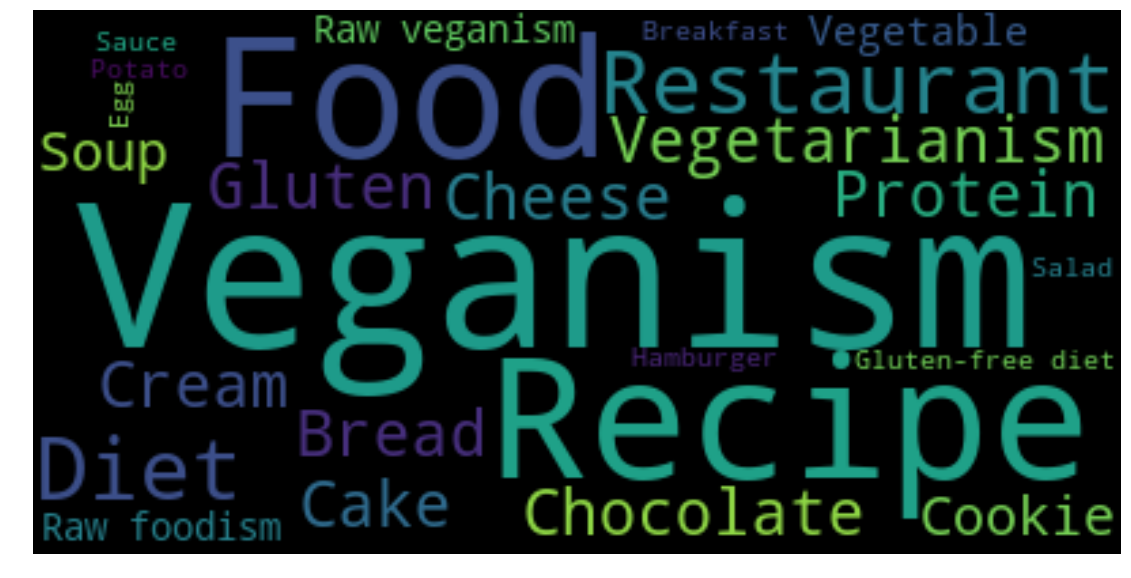

In [50]:
wordcloud.generate_from_frequencies(frequencies=vegan_dict)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()